In [1]:
#########################################################
# Data_Set_Label_Normalization.csv 此資料集已完成正規化處理
# 取三軸的九個特徵做分群
#########################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

Data_Set = pd.read_csv("Data_Set_Label_Normalization.csv")
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]

Data_Set

,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle
0,0.585974,0.558023,0.424284,0.418915,0.500327,0.587392,0.466437,0.734749,0.139382
1,0.590232,0.568828,0.421940,0.471179,0.463425,0.577468,0.417737,0.652647,0.137579
2,0.604023,0.576542,0.423351,0.431287,0.572894,0.618667,0.536579,0.837403,0.170874
3,0.567940,0.549999,0.422881,0.454505,0.490137,0.577534,0.452088,0.709959,0.141418
4,0.605088,0.562037,0.422411,0.420709,0.515467,0.575667,0.484213,0.756366,0.142293
...,...,...,...,...,...,...,...,...,...
27572,0.575360,0.558332,0.421007,0.394980,0.505786,0.578255,0.472455,0.743724,0.114576
27573,0.629508,0.567904,0.420537,0.358315,0.516777,0.603373,0.484279,0.755581,0.117165
27574,0.549890,0.568209,0.420067,0.445899,0.518670,0.589684,0.487497,0.763687,0.130912
27575,0.665592,0.568828,0.421007,0.400000,0.526166,0.589160,0.495454,0.768721,0.123964


In [2]:
#########################################################
# 探討分群的最佳群數,使用下面的方法驗證.
# Silhouette score、Calinski-Harabasz Index、Davies-Bouldin score、Elbow Method（SSE）
#########################################################

K_Max = int(input('輸入最大探討群數：'))

輸入最大探討群數：20


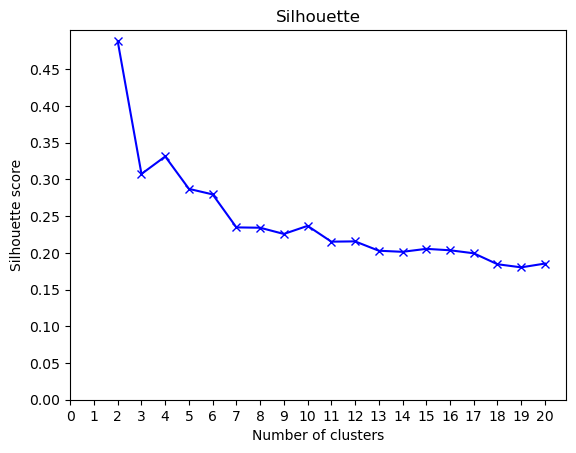

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 設定K的範圍
K_range = range(2, K_Max+1)

# 儲存每個K的silhouette score
silhouette_scores = []

# 計算每個K的silhouette score
for K in K_range:
    # 建立KMeans模型
    model = KMeans(n_clusters=K, random_state=0)
    # 將資料分成K群
    labels = model.fit_predict(Data_Set)
    # 計算silhouette score
    score = silhouette_score(Data_Set, labels)
    # 儲存silhouette score
    silhouette_scores.append(score)

# 畫出K與silhouette score之間的關係圖
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 0.5, 0.05))
plt.savefig('Silhouette score.png')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# 儲存每個K的calinski harabasz score
calinski_scores = []

# 設定K的範圍
K_range = range(2, K_Max+1)

# 計算每個K的calinski harabasz score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算calinski harabasz score
    score = calinski_harabasz_score(Data_Set, kmeans.labels_)

    # 儲存calinski harabasz score
    calinski_scores.append(score)

# 畫出K與calinski harabasz score之間的關係圖
plt.plot(K_range, calinski_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(6000, 13000, 1000))

plt.savefig('Calinski-Harabasz Index.png')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# 載入資料
# X = ...

# 設定K的範圍
K_range = range(2, K_Max+1)

# 儲存每個K的davies_bouldin score
davies_bouldin_scores = []

# 計算每個K的davies_bouldin score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算davies_bouldin score
    score = davies_bouldin_score(Data_Set, kmeans.labels_)

    # 儲存davies_bouldin score
    davies_bouldin_scores.append(score)

# 畫出K與davies_bouldin score之間的關係圖
plt.plot(K_range, davies_bouldin_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin score')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0.9, 1.36, 0.05))

plt.savefig('Davies-Bouldin score.png')
plt.show()



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 設定K的範圍
K_range = range(2, K_Max+1)

# 儲存每個K的inertia
inertias = []

# 計算每個K的inertia
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 儲存inertia
    inertias.append(kmeans.inertia_)

# 畫出K與inertia之間的關係圖
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 1400, 100))

plt.savefig('Elbow Method.png')
plt.show()

In [ ]:
#######################################################################################
# 觀察完最佳群數分別為3、4、5
# 提取 6 種動作各一筆與各特徵進行探討
# 將動作依相似與不相似分成6組來觀察
# 並顯示出每個動作的動作元素
# 圖表各儲存為2張 （1張為最佳尺標（方便觀察）、1張為固定尺標（方便與其他組做比較））
#######################################################################################

In [ ]:
# 以下程式碼以5群為例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data_Set = pd.read_csv("Data_Set_Label_Normalization.csv")
Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]

# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=5)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

In [ ]:
Data_Set.to_csv('DataSet_5cluster.csv')

In [ ]:
# 為了方便探討將各取一筆畫圖觀察
Data_Set_Left = Data_Set[Data_Set['Action'] == 'Turn left 1']
Data_Set_Right = Data_Set[Data_Set['Action'] == 'Turn right 1']
Data_Set_Idle = Data_Set[Data_Set['Action'] == 'Idle 1']
Data_Set_Two = Data_Set[Data_Set['Action'] == 'Two-stage left turn 1']
Data_Set_U = Data_Set[Data_Set['Action'] == 'U-turn 1']
Data_Set_Go = Data_Set[Data_Set['Action'] == 'Go straight 1']

In [ ]:
#######################################################################################
# 不相似的動作
# 第一組：　右轉與左轉
# 第二組：　右轉與迴轉
# 第三組：　右轉與待轉
#######################################################################################

In [ ]:
#######################################################################################
# 不相似的動作
# 第一組：　右轉與左轉
#######################################################################################

In [ ]:
# Z軸角速度  (討論特徵一)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Angular Velocity\n Turn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
#  X軸角速度 （討論特徵二）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Angular Velocity\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
#  Y軸角速度（討論特徵三）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Angular Velocity\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
#  Z軸加速度 （討論特徵四）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Acceleration\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
#  X軸加速度 （討論特徵五）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Acceleration\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#  Y軸加速度 （討論特徵六）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Acceleration\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
#  Z角度 （討論特徵七）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Angle\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#  X角度  （討論特徵八）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Angle\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#  Y角度 （討論特徵九）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Angle\nTurn right vs Turn left')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Turn right vs Turn left（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Turn right vs Turn left（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#######################################################################################
# 不相似的動作
# 第二組：　右轉與迴轉
#######################################################################################

In [ ]:
# Z軸角速度  (討論特徵一)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angular Velocity\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角速度  (討論特徵二)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angular Velocity\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
#Y軸角速度  (討論特徵三)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angular Velocity\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# Z軸加速度 （討論特徵四）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Acceleration\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
# X軸加速度 （討論特徵五）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Acceleration\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸加速度 （討論特徵六）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Acceleration\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
# Z軸角度（討論特徵七）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angle\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# X軸角度（討論特徵八）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angle\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角度（討論特徵九）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angle\nTurn right vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Turn right vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Turn right vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#######################################################################################
# 不相似的動作
# 第三組：　右轉與待轉
#######################################################################################

In [ ]:
# Z軸角速度  (討論特徵一)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

plt.title('Z-axis Angular Velocity\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角速度  (討論特徵二)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

plt.title('X-axis Angular Velocity\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角速度  (討論特徵三)
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Angular Velocity\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸加速度 （討論特徵四）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Z-axis Acceleration\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
# X軸加速度 （討論特徵五）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('X-axis Acceleration\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸加速度 （討論特徵六）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Acceleration\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸角度（討論特徵七）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Z-axis Angle\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角度（討論特徵八）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('X-axis Angle\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角度（討論特徵九）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Angle\nTurn right vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Turn right vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Turn right vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
#######################################################################################
# 相似的動作
# 第一組：　左轉與迴轉
# 第二組：　左轉與待轉
# 第三組：　怠速與直線
#######################################################################################

In [ ]:
#######################################################################################
# 相似的動作
# 第一組：　左轉與迴轉
#######################################################################################

In [ ]:
# Z軸角速度  (討論特徵一)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angular Velocity\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角速度  (討論特徵二)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angular Velocity\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
# Y軸角速度  (討論特徵三)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angular Velocity\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# Z軸加速度  (討論特徵四)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Acceleration\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸加速度  (討論特徵五)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Acceleration\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸加速度  (討論特徵六)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Acceleration\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸角度 (討論特徵七)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angle\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# X軸角度 (討論特徵八)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angle\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角度 (討論特徵九)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angle\nTurn left vs U-turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Turn left vs U-turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Turn left vs U-turn（unite）.png', bbox_inches='tight')

plt.show()


In [ ]:
#######################################################################################
# 相似的動作
# 第二組：　左轉與待轉
#######################################################################################

In [ ]:
# Z軸角速度  (討論特徵一)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Z-axis Angular Velocity\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角速度  (討論特徵二)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('X-axis Angular Velocity\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角速度  (討論特徵三)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Angular Velocity\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸加速度（討論特徵四）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Z-axis Acceleration\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸加速度（討論特徵五）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('X-axis Acceleration\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸加速度（討論特徵六）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Acceleration\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸角度（討論特徵七）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Z-axis Angle\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角度（討論特徵八）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('X-axis Angle\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角度（討論特徵九）

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.title('Y-axis Angle\nTurn left vs Two-stage left turn')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Turn left vs Two-stage left turn（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Turn left vs Two-stage left turn（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
#######################################################################################
# 相似的動作
# 第三組：　怠速與直線
#######################################################################################

In [ ]:
# Z軸角速度（討論特徵一）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angular Velocity\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angular Velocity Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角速度（討論特徵二）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angular Velocity\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angular Velocity Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angular Velocity Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Y軸角速度（討論特徵二）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angular Velocity\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angular Velocity Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angular Velocity Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# Z軸加速度（討論特徵四）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Acceleration\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Acceleration Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Acceleration Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸加速度（討論特徵五）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Acceleration\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Acceleration Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Acceleration Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# Y軸加速度（討論特徵六）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Acceleration\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Acceleration Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# Z軸角度（討論特徵七）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Z-axis Angle\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angle Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Z-axis Angle Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()

In [ ]:
# X軸角度（討論特徵八）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('X-axis Angle\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('X-axis Angle Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('X-axis Angle Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()



In [ ]:
# Y軸角度（討論特徵九）
# 因為怠速與直線動作元素（數量差異太大）,加上怠速變化量不大故取前半部資料畫圖比較

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))

for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.title('Y-axis Angle\nIdle vs Go straight')

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Angle Idle vs Go straight（best）.png', bbox_inches='tight')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('Y-axis Angle Idle vs Go straight（unite）.png', bbox_inches='tight')

plt.show()